## 1. Постановка задачи

    
Вам предстоит решить настоящую задачу машинного обучения, направленную на автоматизацию бизнес процессов. Мы построим модель, которая будет предсказывать общую продолжительность поездки такси в Нью-Йорке. 

Представьте вы заказываете такси из одной точки Нью-Йорка в другую, причем не обязательно конечная точка должна находиться в пределах города. Сколько вы должны будете за нее заплатить? Известно, что стоимость такси в США  рассчитывается на основе фиксированной ставки + тарифная стоимость, величина которой зависит от времени и расстояния. Тарифы варьируются в зависимости от города.

В свою очередь время поездки зависит от множества факторов таких как, откуда и куда вы едете, в какое время суток вы совершаете вашу поездку, погодных условий и так далее. 

Таким образом, если мы разработаем алгоритм, способный определять длительность поездки, мы сможем прогнозировать ее стоимость самым тривиальным образом, например, просто умножая стоимость на заданный тариф. 
Сервисы такси хранят огромные объёмы информации о поездках, включая такие данные как конечная, начальная точка маршрута, дата поездки и ее длительность. Эти данные можно использовать для того, чтобы прогнозировать длительность поездки в автоматическом режиме с привлечением искусственного интеллекта.

**Бизнес-задача:** определить характеристики и с их помощью спрогнозировать длительность поездки такси.

**Техническая задача для вас как для специалиста в Data Science:** построить модель машинного обучения, которая на основе предложенных характеристик клиента будет предсказывать числовой признак - время поездки такси. То есть решить задачу регрессии.

**Основные цели проекта:**
1. Сформировать набор данных на основе нескольких источников информации
2. Спроектировать новые признаки с помощью Feature Engineering и выявить наиболее значимые при построении модели
3. Исследовать предоставленные данные и выявить закономерности
4. Построить несколько моделей и выбрать из них наилучшую по заданной метрике
5. Спроектировать процесс предсказания времени длительности поездки для новых данных

Загрузить свое решение на платформу Kaggle, тем самым поучаствовав в настоящем Data Science соревновании.
Во время выполнения проекта вы отработаете навыки работы с несколькими источниками данных, генерации признаков, разведывательного анализа и визуализации данных, отбора признаков и, конечно же, построения моделей машинного обучения!


## 2. Знакомство с данными, базовый анализ и расширение данных

Начнём наше исследование со знакомства с предоставленными данными. А также подгрузим дополнительные источники данных и расширим наш исходный датасет. 


Заранее импортируем модули, которые нам понадобятся для решения задачи:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import feature_selection
from sklearn.preprocessing import OneHotEncoder
import sklearn

In [2]:
print(pd.__version__)
print(np.__version__)
print(sklearn.__version__)

2.2.3
2.2.2
1.6.1


Прочитаем наш файл с исходными данными:

In [3]:
df = pd.read_csv("~/Desktop/Projects/NY_Taxi_Trip_Duration/data/train.csv")
taxi_data = df.copy()
print('Train data shape: {}'.format(taxi_data.shape))
taxi_data.head()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/rodinilya/Desktop/Projects/NY_Taxi_Trip_Duration/data/train.csv'

Итак, у нас с вами есть данные о почти 1.5 миллионах поездок и 11 характеристиках, которые описывают каждую из поездок. 

Мы условно разделили признаки нескольких групп. Каждой из групп мы в дальнейшем уделим отдельное внимание.

**Данные о клиенте и таксопарке:**
* id - уникальный идентификатор поездки
* vendor_id - уникальный идентификатор поставщика (таксопарка), связанного с записью поездки

**Временные характеристики:**
* pickup_datetime - дата и время, когда был включен счетчик поездки
* dropoff_datetime - дата и время, когда счетчик был отключен

**Географическая информация:**
* pickup_longitude -  долгота, на которой был включен счетчик
* pickup_latitude - широта, на которой был включен счетчик
* dropoff_longitude - долгота, на которой счетчик был отключен
* dropoff_latitude - широта, на которой счетчик был отключен

**Прочие признаки:**
* passenger_count - количество пассажиров в транспортном средстве (введенное водителем значение)
* store_and_fwd_flag - флаг, который указывает, сохранилась ли запись о поездке в памяти транспортного средства перед отправкой поставщику. Y - хранить и пересылать, N - не хранить и не пересылать поездку.

**Целевой признак:**
* trip_duration - продолжительность поездки в секундах


Для начала мы проведем базовый анализ того, насколько данные готовы к дальнейшей предобработке и анализу. 

### Задание 2.1
Для начала посмотрим на временные рамки, в которых мы работаем с данными.

Переведите признак pickup_datetime в тип данных datetime с форматом год-месяц-день час:минута:секунда (в функции pd.to_datetime() параметр format='%Y-%m-%d %H:%M:%S'). 

Определите временные рамки (без учета времени), за которые представлены данные.

In [ ]:
# ваш код здесь
taxi_data['pickup_datetime'] = pd.to_datetime(taxi_data['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
#print(f'Первая дата: {taxi_data['pickup_datetime'].dt.date.min()}')
#print(f'Послденяя дата: {taxi_data['pickup_datetime'].dt.date.max()}')

### Задание 2.2
Посмотрим на пропуски. 
Сколько пропущенных значений присутствует в данных (суммарно по всем столбцам таблицы)?

In [ ]:
# ваш код здесь
taxi_data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

Пропуски отсутствуют

In [ ]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  object        
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 122.4+ MB


### Задание 2.3
Посмотрим на статистические характеристики некоторых признаков. 

а) Сколько уникальных таксопарков присутствует в данных?

б) Каково максимальное количество пассажиров?

в) Чему равна средняя и медианная длительность поездки? Ответ приведите в секундах и округлите до целого.

г) Чему равно минимальное и максимальное время поездки (в секундах)?


In [ ]:
pd.set_option('display.float_format', '{:.0f}'.format)

taxi_data.describe()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458644,1458644,1458644,1458644,1458644,1458644,1458644,1458644
mean,2,2016-04-01 10:10:24.940037120,2,-74,41,-74,41,959
min,1,2016-01-01 00:00:17,0,-122,34,-122,32,1
25%,1,2016-02-17 16:46:04.249999872,1,-74,41,-74,41,397
50%,2,2016-04-01 17:19:40,1,-74,41,-74,41,662
75%,2,2016-05-15 03:56:08.750000128,2,-74,41,-74,41,1075
max,2,2016-06-30 23:59:39,9,-61,52,-61,44,3526282
std,0,NaN,1,0,0,0,0,5237


Займемся расширением исходного набора данных как с помощью внешних источников, так и с помощью манипуляций над имеющимися в данных признаками. 


### Задание 2.4
Реализуйте функцию add_datetime_features(), которая принимает на вход таблицу с данными о поездках (DataFrame) и возвращает ту же таблицу с добавленными в нее 3 столбцами:
* pickup_date - дата включения счетчика - начала поездки (без времени);
* pickup_hour - час дня включения счетчика;
* pickup_day_of_week - порядковый номер дня недели (число), в который был включен счетчик.

а) Сколько поездок было совершено в субботу?

б) Сколько поездок в среднем совершается в день? Ответ округлите до целого

In [ ]:
taxi_data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-74,41,-74,41,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-74,41,-74,41,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-74,41,-74,41,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74,41,-74,41,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-74,41,-74,41,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-74,41,-74,41,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74,41,-74,41,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-74,41,-74,41,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-74,41,-74,41,N,373


In [ ]:
# ваш код здесь
def add_datetime_features(df) -> pd.DataFrame:
    """
    Добавляет в DataFrame с данными о поездках три новых столбца:
    - pickup_date — дата начала поездки (без времени)
    - pickup_hour — час начала поездки
    - pickup_day_of_week — номер дня недели (0 = понедельник, ..., 6 = воскресенье)

    Аргументы:
        df (pd.DataFrame): исходный DataFrame с колонкой 'pickup_datetime' типа datetime64[ns]

    Возвращает:
        pd.DataFrame: исходный DataFrame с добавленными тремя новыми столбцами
    """
    df['pickup_date'] = df['pickup_datetime'].dt.date
    df['pickup_hour'] = df['pickup_datetime'].dt.hour
    df['pickup_day_of_week'] = df['pickup_datetime'].dt.dayofweek
    
    return df

taxi_data = add_datetime_features(taxi_data)

#print(f'Поездки, совершенные в субботы: {taxi_data[taxi_data['pickup_day_of_week'] == 5].shape[0]}')
#print(f'Поездок в среднем: {round(taxi_data['pickup_date'].shape[0]/taxi_data['pickup_date'].nunique())}')

In [ ]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 14 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  object        
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
 11  pickup_date         1458644 non-null  object        
 12  pickup_hour         1458644 non-null  int32         
 13  pickup_day_o

### Задание 2.5
Реализуйте функцию add_holiday_features(), которая принимает на вход две таблицы: 
* таблицу с данными о поездках;
* таблицу с данными о праздничных днях;

и возвращает обновленную таблицу с данными о поездках с добавленным в нее столбцом pickup_holiday - бинарным признаком того, начата ли поездка в праздничный день или нет (1 - да, 0 - нет). 

Чему равна медианная длительность поездки на такси в праздничные дни? Ответ приведите в секундах, округлив до целого.


In [ ]:
taxi_data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_hour,pickup_day_of_week
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-74,41,-74,41,N,455,2016-03-14,17,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-74,41,-74,41,N,663,2016-06-12,0,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-74,41,-74,41,N,2124,2016-01-19,11,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74,41,-74,41,N,429,2016-04-06,19,2
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-74,41,-74,41,N,435,2016-03-26,13,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-74,41,-74,41,N,778,2016-04-08,13,4
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74,41,-74,41,N,655,2016-01-10,7,6
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-74,41,-74,41,N,764,2016-04-22,6,4
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-74,41,-74,41,N,373,2016-01-05,15,1


In [ ]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 14 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  object        
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
 11  pickup_date         1458644 non-null  object        
 12  pickup_hour         1458644 non-null  int32         
 13  pickup_day_o

In [ ]:
holiday_data = pd.read_csv('~/Desktop/Projects/NY_Taxi_Trip_Duration/data/holiday_data.csv', sep=';')
# ваш код здесь
def add_holiday_features(taxi_data, holiday_data) -> pd.DataFrame:
    """"
    Добавляет признак, указывающий, выпадает ли дата поездки на праздничный день.

    Параметры:
    ----------
    taxi_data : pandas.DataFrame
        Таблица с данными о поездках такси. 
        Обязателен столбец 'pickup_date' с датой начала поездки.
    
    holiday_data : pandas.DataFrame
        Таблица с праздничными датами.
        Обязателен столбец 'date' с датами праздников.
    
    Возвращает:
    -----------
    pandas.DataFrame
        Исходный DataFrame taxi_data с новым булевым столбцом 'pickup_holiday',
        где True означает, что поездка была в праздничный день, иначе False.
    """
    holiday_data['date'] = pd.to_datetime(holiday_data['date']).dt.date
    taxi_data['pickup_holiday'] = taxi_data['pickup_date'].isin(holiday_data['date'])
    
    return taxi_data

taxi_data = add_holiday_features(taxi_data, holiday_data)

taxi_data[taxi_data['pickup_holiday'] == 1]['trip_duration'].median()

585.0

### Задание 2.6
Реализуйте функцию add_osrm_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными из OSRM;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 3 столбцами:
* total_distance;
* total_travel_time;
* number_of_steps.

а) Чему равна разница (в секундах) между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM? 

В результате объединения таблиц у вас должны были получиться пропуски в столбцах с информацией из OSRM API. Это связано с тем, что для некоторых поездок не удалось выгрузить данные из веб источника. 

б) Сколько пропусков содержится в столбцах с информацией из OSRM API после объединения таблиц?

In [ ]:
osrm_data = pd.read_csv('~/Desktop/Projects/NY_Taxi_Trip_Duration/data/osrm_data_train.csv')
# ваш код здесь
osrm_data.head()

def add_osrm_features(data, data_2, on='id', how='left', columns = ['id','total_distance', 'total_travel_time', 'number_of_steps']):
    merged_data = data.merge(
        data_2[columns],
        on=on,
        how=how
    )
    return merged_data                                                                                                                                                    
taxi_data = add_osrm_features(taxi_data, osrm_data)
print(round(taxi_data['trip_duration'].median() - taxi_data['total_travel_time'].median()))

372


In [ ]:
def get_haversine_distance(lat1, lng1, lat2, lng2):
    """
    Вычисляет расстояние между двумя точками на земной поверхности по формуле Хаверсина.

    Аргументы:
    ----------
    lat1, lng1 : array-like или числа
        Широта и долгота первой точки в градусах.
    lat2, lng2 : array-like или числа
        Широта и долгота второй точки в градусах.

    Возвращает:
    ----------
    np.ndarray или число
        Расстояние между точками в километрах.
    """
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    EARTH_RADIUS = 6371  # радиус Земли в километрах

    lat_delta = lat2 - lat1
    lng_delta = lng2 - lng1

    d = np.sin(lat_delta * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng_delta * 0.5) ** 2
    h = 2 * EARTH_RADIUS * np.arcsin(np.sqrt(d))

    return h

def get_angle_direction(lat1, lng1, lat2, lng2):
    """
    Вычисляет направление движения (угол пеленга) от первой точки ко второй.

    Аргументы:
    ----------
    lat1, lng1 : array-like или числа
        Широта и долгота первой точки в градусах.
    lat2, lng2 : array-like или числа
        Широта и долгота второй точки в градусах.

    Возвращает:
    ----------
    np.ndarray или число
        Угол направления в градусах, где 0° — север, положительные значения — поворот по часовой стрелке.
    """
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))

    lng_delta_rad = lng2 - lng1
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    alpha = np.degrees(np.arctan2(y, x))

    return alpha

### Задание 2.7.
Реализуйте функцию add_geographical_features(), которая принимает на вход таблицу с данными о поездках и возвращает обновленную таблицу с добавленными в нее 2 столбцами:
* haversine_distance - расстояние Хаверсина между точкой, в которой был включен счетчик, и точкой, в которой счетчик был выключен;
* direction - направление движения из точки, в которой был включен счетчик, в точку, в которой счетчик был выключен.

Чему равно медианное расстояние Хаверсина поездок (в киллометрах)? Ответ округлите до сотых.


In [ ]:
# ваш код здесь
def add_geographical_features(df: pd.DataFrame) -> pd.DataFrame:
    """
    Добавляет в DataFrame два новых признака:  
    - расстояние между точками посадки и высадки (distance)  
    - направление движения от точки посадки к точке высадки (direction)

    Аргументы:
    ----------
    df : pd.DataFrame
        DataFrame с колонками: 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'.

    Возвращает:
    ----------
    pd.DataFrame
        Обновлённый DataFrame с добавленными столбцами 'distance' и 'direction'.
    """
    df['haversine_distance'] = get_haversine_distance(
        df['pickup_latitude'], df['pickup_longitude'], 
        df['dropoff_latitude'], df['dropoff_longitude']
    )
    df['direction'] = get_angle_direction(
        df['pickup_latitude'], df['pickup_longitude'], 
        df['dropoff_latitude'], df['dropoff_longitude']
    )
    
    return df

# Использование
taxi_data = add_geographical_features(taxi_data)

print(round(taxi_data['haversine_distance'].median(), 2))

2.09


### Задание 2.8.
Реализуйте функцию add_cluster_features(), которая принимает на вход таблицу с данными о поездках и обученный алгоритм кластеризации. Функция должна возвращать обновленную таблицу с добавленными в нее столбцом geo_cluster - географический кластер, к которому относится поездка.

Сколько поездок содержится в наименьшем по размеру географическом кластере?


In [ ]:
from sklearn.cluster import KMeans

# создаем обучающую выборку из географических координат всех точек
coords = np.hstack((taxi_data[['pickup_latitude', 'pickup_longitude']],
                    taxi_data[['dropoff_latitude', 'dropoff_longitude']]))
# обучаем алгоритм кластеризации
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(coords)

# ваш код здесь
def add_cluster_features(df: pd.DataFrame, clst_alg: KMeans) -> pd.DataFrame:
    """
    Добавляет в DataFrame столбец 'geo_cluster' с метками кластеров, 
    предсказанными с помощью обученного алгоритма кластеризации.

    Аргументы:
    ----------
    df : pd.DataFrame
        Таблица с данными о поездках, содержащая координаты 'pickup_latitude', 
        'pickup_longitude', 'dropoff_latitude' и 'dropoff_longitude'.
    clst_alg : объект
        Обученный алгоритм кластеризации.

    Возвращает:
    ----------
    pd.DataFrame
        Обновлённый DataFrame с добавленным столбцом 'geo_cluster'.
    """
    coords = np.hstack((
        df[['pickup_latitude', 'pickup_longitude']],
        df[['dropoff_latitude', 'dropoff_longitude']]
    ))
    
    df['geo_cluster'] = clst_alg.predict(coords)
    
    return df

taxi_data = add_cluster_features(taxi_data, kmeans)

taxi_data['geo_cluster'].value_counts()

/Users/rodinilya/Desktop/Projects/NY_Taxi_Trip_Duration/taxi_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


geo_cluster
0    596467
9    383874
4    359233
5     43619
7     41171
3     27022
1      7233
6        18
8         5
2         2
Name: count, dtype: int64

### Задание 2.9.
Реализуйте функцию add_weather_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными о погодных условиях на каждый час;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 5 столбцами:
* temperature - температура;
* visibility - видимость;
* wind speed - средняя скорость ветра;
* precip - количество осадков;
* events - погодные явления.

а) Сколько поездок было совершено в снежную погоду?

В результате объединения у вас должны получиться записи, для которых в столбцах temperature, visibility, wind speed, precip, и events будут пропуски. Это связано с тем, что в таблице с данными о погодных условиях отсутствуют измерения для некоторых моментов времени, в которых включался счетчик поездки. 

б) Сколько процентов от общего количества наблюдений в таблице с данными о поездках занимают пропуски в столбцах с погодными условиями? Ответ приведите с точностью до сотых процента.


In [ ]:
weather_data = pd.read_csv('~/Desktop/Projects/NY_Taxi_Trip_Duration/data/weather_data.csv')

# ваш код здесь
def add_weather_features(taxi_data, weather_data):
    # Приводим даты и часы к совместимым типам
    taxi_data['pickup_date'] = pd.to_datetime(taxi_data['pickup_date']).dt.date
    weather_data['date'] = pd.to_datetime(weather_data['date']).dt.date

    taxi_data['pickup_hour'] = taxi_data['pickup_hour'].astype(int)
    weather_data['hour'] = weather_data['hour'].astype(int)

    # Приводим events к нижнему регистру
    weather_data['events'] = weather_data['events'].str.lower().str.strip()

    # Оставляем нужные столбцы
    weather_data_features = weather_data[['temperature', 'visibility', 'wind speed', 'precip', 'events', 'date', 'hour']]

    # Объединяем
    merged = pd.merge(
        taxi_data,
        weather_data_features,
        left_on=['pickup_date', 'pickup_hour'],
        right_on=['date', 'hour'],
        how='left'
    )

    return merged.drop(columns=['date', 'hour'])

taxi_data = add_weather_features(taxi_data, weather_data)

taxi_data[taxi_data['events'] == 'snow'].shape[0]

13126

In [ ]:
(taxi_data['temperature'].isnull().sum() / taxi_data.shape[0]) * 100

0.8248757064780714

### Задание 2.10.
Реализуйте функцию fill_null_weather_data(), которая принимает на вход которая принимает на вход таблицу с данными о поездках. Функция должна заполнять пропущенные значения в столбцах.

Пропуски в столбцах с погодными условиями -  temperature, visibility, wind speed, precip заполните медианным значением температуры, влажности, скорости ветра и видимости в зависимости от даты начала поездки. Для этого сгруппируйте данные по столбцу pickup_date и рассчитайте медиану в каждой группе, после чего с помощью комбинации методов transform() и fillna() заполните пропуски. 
Пропуски в столбце events заполните строкой 'None' - символом отсутствия погодных явлений (снега/дождя/тумана). 

Пропуски в столбцах с информацией из OSRM API - total_distance, total_travel_time и number_of_steps заполните медианным значением по столбцам. 

Чему равна медиана в столбце temperature после заполнения пропусков? Ответ округлите до десятых.


In [ ]:
# ваш код здесь
def fill_null_weather_data(taxi_data):
    for col in ['temperature', 'visibility', 'wind speed', 'precip']:
        taxi_data[col] = taxi_data[col].fillna(taxi_data.groupby('pickup_date')[col].transform('median'))
        
    taxi_data['events'] = taxi_data['events'].fillna('None')
    
    for col in ['total_distance', 'total_travel_time', 'number_of_steps']:
        taxi_data[col] = taxi_data[col].fillna(taxi_data[col].median())
        
    return taxi_data

taxi_data = fill_null_weather_data(taxi_data)

taxi_data['temperature'].median()

11.1

В завершение первой части найдем очевидные выбросы в целевой переменной - длительности поездки. 

Проще всего найти слишком продолжительные поездки. Давайте условимся, что выбросами будут считаться поездки, длительность которых превышает 24 часа. 

Чуть сложнее с анализом поездок, длительность которых слишком мала. Потому что к ним относятся действительно реальные поездки на короткие расстояния, поездки, которые были отменены через секунду после того как включился счетчик, а также “телепортации” - перемещение на большие расстояния за считанные секунды. 
Условимся, что мы будем считать выбросами только последнюю группу. Как же нам их обнаружить наиболее простым способом?

Можно воспользоваться информацией о кратчайшем расстоянии, которое проезжает такси. Вычислить среднюю скорость автомобиля на кратчайшем пути следующим образом: 
$$avg\_speed= \frac{total\_distance}{1000*trip\_duration}*3600$$
Если мы построим диаграмму рассеяния средней скорости движения автомобилей, мы увидим следующую картину:


Text(0, 0.5, 'Average speed')

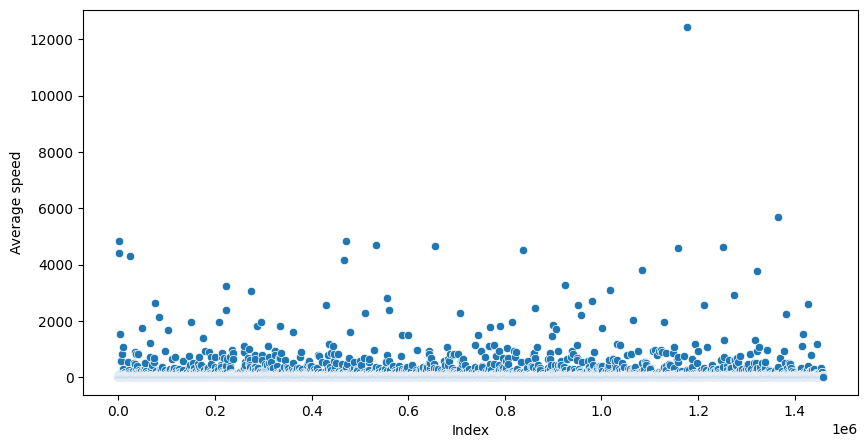

In [ ]:
avg_speed = taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x=avg_speed.index, y=avg_speed, ax=ax)
ax.set_xlabel('Index')
ax.set_ylabel('Average speed')

Как раз отсюда мы видим, что у нас есть “поездки-телепортации”, для которых средняя скорость более 1000 км/ч. Даже есть такая, средняя скорость которой составляла более 12000 км/ч! 

Давайте условимся, что предельная средняя скорость, которую могут развивать таксисты будет 300 км/ч. 


### Задание 2.11.
Найдите поездки, длительность которых превышает 24 часа. И удалите их из набора данных.

а) Сколько выбросов по признаку длительности поездки вам удалось найти?

Найдите поездки, средняя скорость которых по кратчайшему пути превышает 300 км/ч и удалите их из данных. 

б) Сколько выбросов по признаку скорости вам удалось найти?

In [ ]:
# ваш код здесь
taxi_data['avg_speed'] = avg_speed
# Булевы маски для выбросов
mask_time = taxi_data['trip_duration'] / 3600 > 24
mask_speed = taxi_data['avg_speed'] > 300

# Считаем количество выбросов
outliers_time = mask_time.sum()
outliers_speed = mask_speed.sum()
print(outliers_speed, outliers_time)

# Общая маска
outliers_mask = mask_time | mask_speed

# Убираем выбросы
taxi_data = taxi_data[~outliers_mask]
taxi_data = taxi_data.drop('avg_speed', axis=1)

407 4


## 3. Разведывательный анализ данных (EDA)

В этой части нашего проекта мы с вами:
* Исследуем сформированный набор данных; 
* Попробуем найти закономерности, позволяющие сформулировать предварительные гипотезы относительно того, какие факторы являются решающими в определении длительности поездки;
* Дополним наш анализ визуализациями, иллюстрирующими; исследование. Постарайтесь оформлять диаграммы с душой, а не «для галочки»: навыки визуализации полученных выводов обязательно пригодятся вам в будущем.


Начинаем с целевого признака. Забегая вперед, скажем, что основной метрикой качества решения поставленной задачи будет RMSLE - Root Mean Squared Log Error, которая вычисляется на основе целевой переменной в логарифмическом масштабе. В таком случае целесообразно сразу логарифмировать признак длительности поездки и рассматривать при анализе логарифм в качестве целевого признака:
$$trip\_duration\_log = log(trip\_duration+1),$$
где под символом log подразумевается натуральный логарифм.


In [ ]:
taxi_data['trip_duration_log'] = np.log(taxi_data['trip_duration']+1)

### Задание 3.1.
Постройте гистограмму и коробчатую диаграмму длительности поездок в логарифмическом масштабе (trip_duration_log). 
Исходя из визуализации, сделайте предположение, является ли полученное распределение нормальным? 
Проверьте свою гипотезу с помощью теста Д’Агостино при уровне значимости $\alpha=0.05$. 

а) Чему равен вычисленный p-value? Ответ округлите до сотых.

б) Является ли распределение длительности поездок в логарифмическом масштабе нормальным?

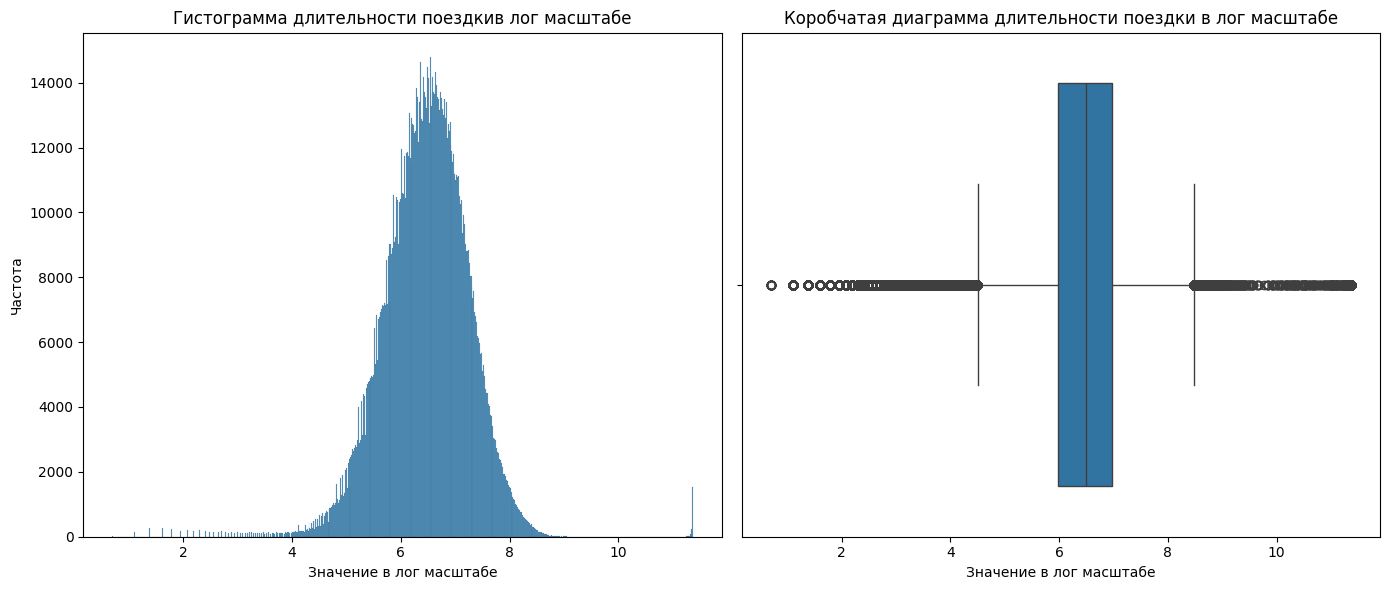

In [ ]:
plt.figure(figsize=(14, 6))

# Гистограмма
plt.subplot(1, 2, 1)
sns.histplot(taxi_data['trip_duration_log'])
plt.title('Гистограмма длительности поездкив лог масштабе')
plt.xlabel('Значение в лог масштабе')
plt.ylabel('Частота')

# Коробчатая диаграмма
plt.subplot(1, 2, 2)
sns.boxplot(x=taxi_data['trip_duration_log'], vert=False)
plt.title('Коробчатая диаграмма длительности поездки в лог масштабе')
plt.xlabel('Значение в лог масштабе')

plt.tight_layout()
plt.show()

Нулевая гипотеза (H0): данные имеют нормальное распределение.

In [ ]:
from scipy.stats import normaltest

alpha = 0.05

statistic, p_value = normaltest(taxi_data['trip_duration_log'])

print(f'p-значение: {p_value}')

# Проверка гипотезы
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: распределение не является нормальным.")
else:
    print("Не отвергаем нулевую гипотезу: распределение можно считать нормальным.")

p-значение: 0.0
Отвергаем нулевую гипотезу: распределение не является нормальным.


По графику видно, что график скошен вправо. Плюс проверили с помощью normaltest. Распределние целевого признака отлично от нормально.

### Задание 3.2.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от таксопарка (vendor_id). 

Сравните два распределения между собой.

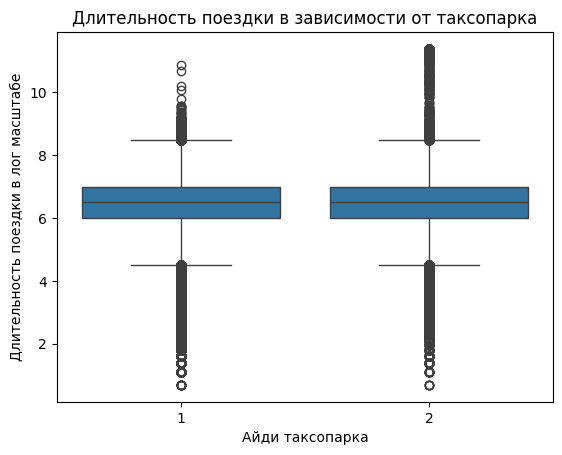

In [ ]:
# ваш код здесь
sns.boxplot(
    data=taxi_data,
    y='trip_duration_log',
    x='vendor_id'
)
plt.title('Длительность поездки в зависимости от таксопарка')
plt.xlabel('Айди таксопарка')
plt.ylabel('Длительность поездки в лог масштабе')
plt.show()

На графике видно, что распределения в группах практически не отличаются, признак vendor_id не имеет значения при определении длительности поездки.

### Задание 3.3.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от признака отправки сообщения поставщику (store_and_fwd_flag). 

Сравните два распределения между собой.

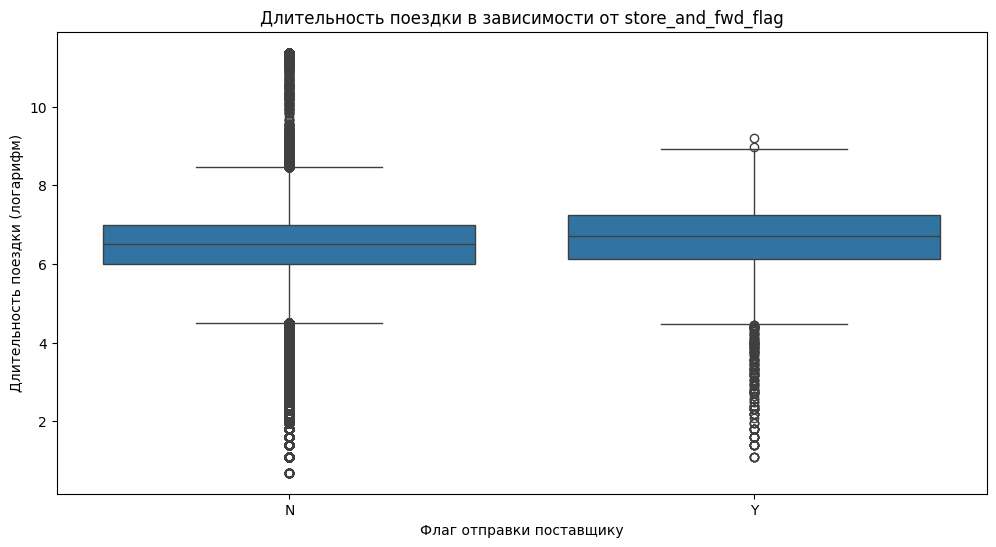

In [ ]:
# ваш код здесь
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=taxi_data,
    x='store_and_fwd_flag',
    y='trip_duration_log'
)
plt.title('Длительность поездки в зависимости от store_and_fwd_flag')
plt.xlabel('Флаг отправки поставщику')
plt.ylabel('Длительность поездки (логарифм)')
plt.show()

Если внимательно присмотреться к распределению длительности поездок в зависимости от признака store_and_fwd_flag, становится ясно, что наиболее длительные поездки принадлежат к группе N (не хранить и не пересылать поездку). Таким образом, флаг сохраняется только для кратковременных поездок, а для аномальных многочасовых — не сохраняется.

### Задание 3.4.
Постройте две визуализации:
* Распределение количества поездок в зависимости от часа дня;
* Зависимость медианной длительности поездки от часа дня.

На основе построенных графиков ответьте на следующие вопросы:

а) В какое время суток такси заказывают реже всего?

б) В какое время суток наблюдается пик медианной длительности поездок?

Text(0, 0.5, 'Количество поездок')

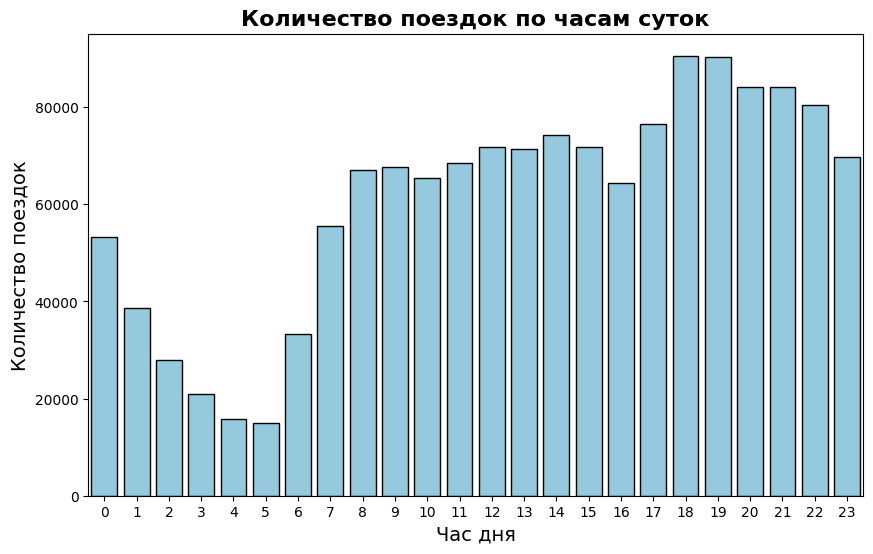

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(
    data=taxi_data,
    x='pickup_hour',
    color='skyblue',
    edgecolor='black',   
)
plt.title('Количество поездок по часам суток', fontsize=16, fontweight='bold')
plt.xlabel('Час дня', fontsize=14)
plt.ylabel('Количество поездок', fontsize=14)

На графике видно, что с 00:00 по 5:00 такси заказывают реже всего. А чаще всего с 18:00 по 22:00


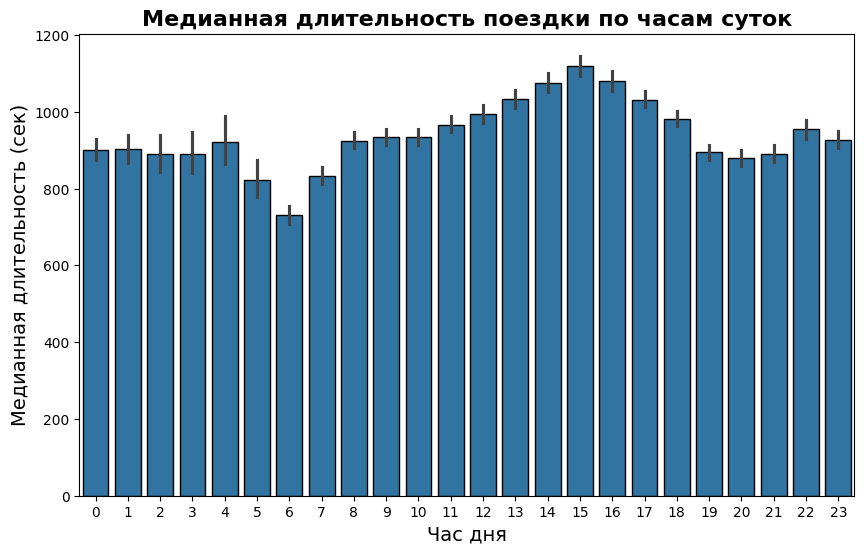

In [ ]:
median_trip_by_hour = taxi_data.groupby('pickup_hour')['trip_duration'].median()
plt.figure(figsize=(10, 6))
sns.barplot(
    data=taxi_data,
    x='pickup_hour',
    y='trip_duration',
    edgecolor='black'
)
plt.title('Медианная длительность поездки по часам суток', fontsize=16, fontweight='bold')
plt.xlabel('Час дня', fontsize=14)
plt.ylabel('Медианная длительность (сек)', fontsize=14)
plt.show()

Можем заметить, что с 13:00 по 18:00 наблюдается пик медианной длительности поездок

### Задание 3.5.
Постройте две визуализации:
* Распределение количества поездок в зависимости от дня недели;
*  Зависимость медианной длительности поездки от дня недели.

На основе построенных графиков ответьте на следующие вопросы:
а) В какой день недели совершается больше всего поездок?
б) В какой день недели медианная длительность поездок наименьшая?


Text(0, 0.5, 'Количество поездок')

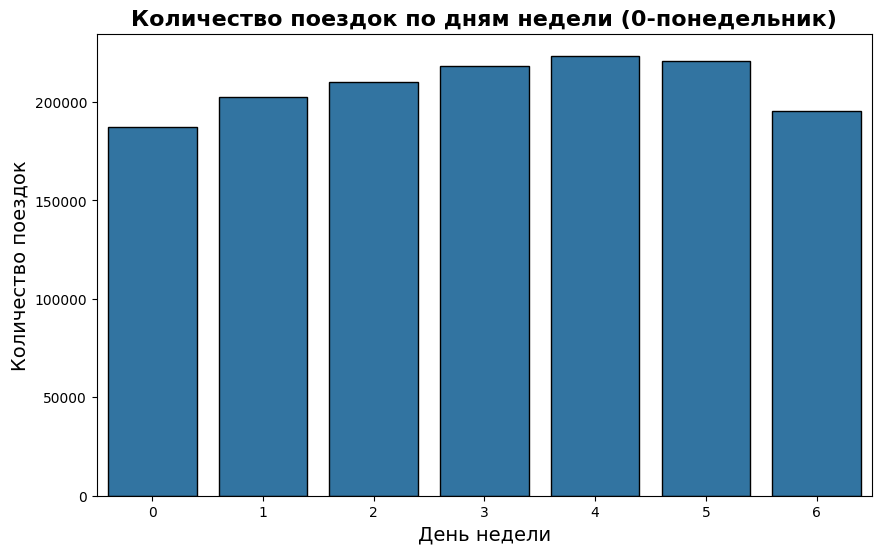

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(
    data=taxi_data,
    x='pickup_day_of_week',
    edgecolor='black'
)
plt.title('Количество поездок по дням недели (0-понедельник)', fontsize=16, fontweight='bold')
plt.xlabel('День недели', fontsize=14)
plt.ylabel('Количество поездок', fontsize=14)

В пятницу совершается больше всего поездок, реже всего в понедельник

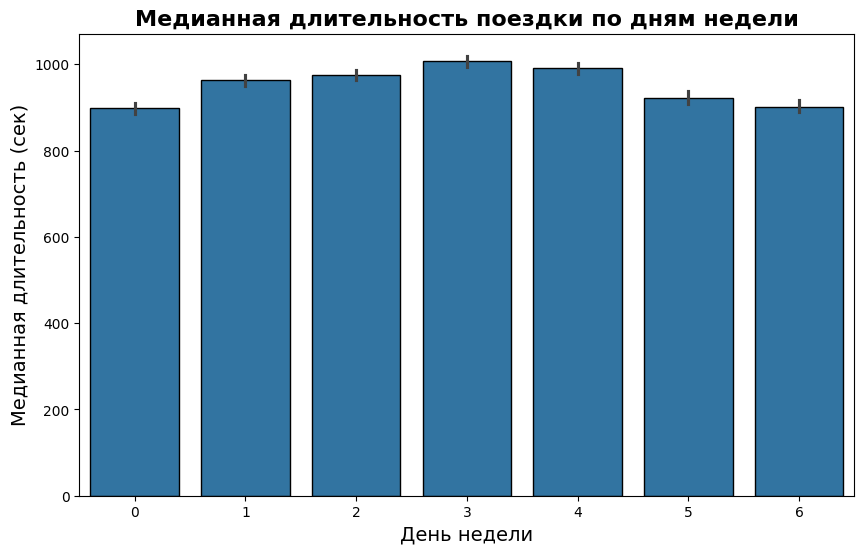

In [ ]:
median_trip_by_dayofweek = taxi_data.groupby('pickup_day_of_week')['trip_duration'].median()
plt.figure(figsize=(10, 6))
sns.barplot(
    data=taxi_data,
    x='pickup_day_of_week',
    y='trip_duration',
    edgecolor='black'
)
plt.title('Медианная длительность поездки по дням недели', fontsize=16, fontweight='bold')
plt.xlabel('День недели', fontsize=14)
plt.ylabel('Медианная длительность (сек)', fontsize=14)
plt.show()

В воскресенье медианная длительность поездок наименьшая

### Задание 3.6.
Посмотрим на обе временные характеристики одновременно. 

Постройте сводную таблицу, по строкам которой отложены часы (pickup_hour), по столбцам - дни недели (pickup_day_of_week), а в ячейках - медианная длительность поездки (trip_duration). 

Визуализируйте полученную сводную таблицу с помощью тепловой карты (рекомендуемая палитра - coolwarm).

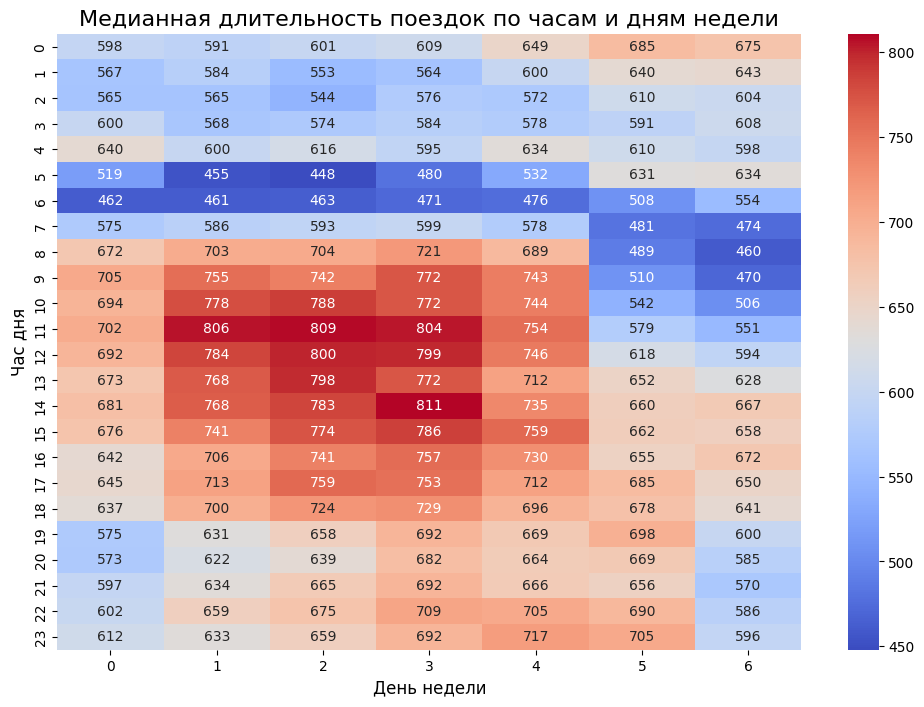

In [ ]:
# ваш код здесь
plt.figure(figsize=(12, 8))
pivot_table = pd.pivot_table(
    data=taxi_data,
    index='pickup_hour',
    columns='pickup_day_of_week',
    values='trip_duration',
    aggfunc='median'
) 
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='.0f')
plt.title("Медианная длительность поездок по часам и дням недели", fontsize=16)
plt.xlabel("День недели", fontsize=12)
plt.ylabel("Час дня", fontsize=12)
plt.show()
plt.show()

Самые продолжительные поездки (в медианном смысле) наблюдаются с понедельника по пятницу в промежутке с 8 до 18 часов.
B Наибольшая медианная длительность поездки наблюдалась в четверг в 14 часов дня.

### Задание 3.7.
Постройте две диаграммы рассеяния (scatter-диаграммы):
* первая должна иллюстрировать географическое расположение точек начала поездок (pickup_longitude, pickup_latitude) 
* вторая должна географическое расположение точек завершения поездок (dropoff_longitude, dropoff_latitude).

Для этого на диаграммах по оси абсцисс отложите широту (longitude), а по оси ординат - долготу (latitude). 
Включите в визуализацию только те точки, которые находятся в пределах Нью-Йорка - добавьте следующие ограничения на границы осей абсцисс и ординат:
 
city_long_border = (-74.03, -73.75)

city_lat_border = (40.63, 40.85)

Добавьте на диаграммы расцветку по десяти географическим кластерам (geo_cluster), которые мы сгенерировали ранее. 

**Рекомендация:** для наглядности уменьшите размер точек на диаграмме рассеяния.  


/var/folders/8z/j62qqp0n6sjdzf2ht_njv39r0000gn/T/ipykernel_31697/2577263076.py:55: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/Users/rodinilya/Desktop/Projects/NY_Taxi_Trip_Duration/taxi_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


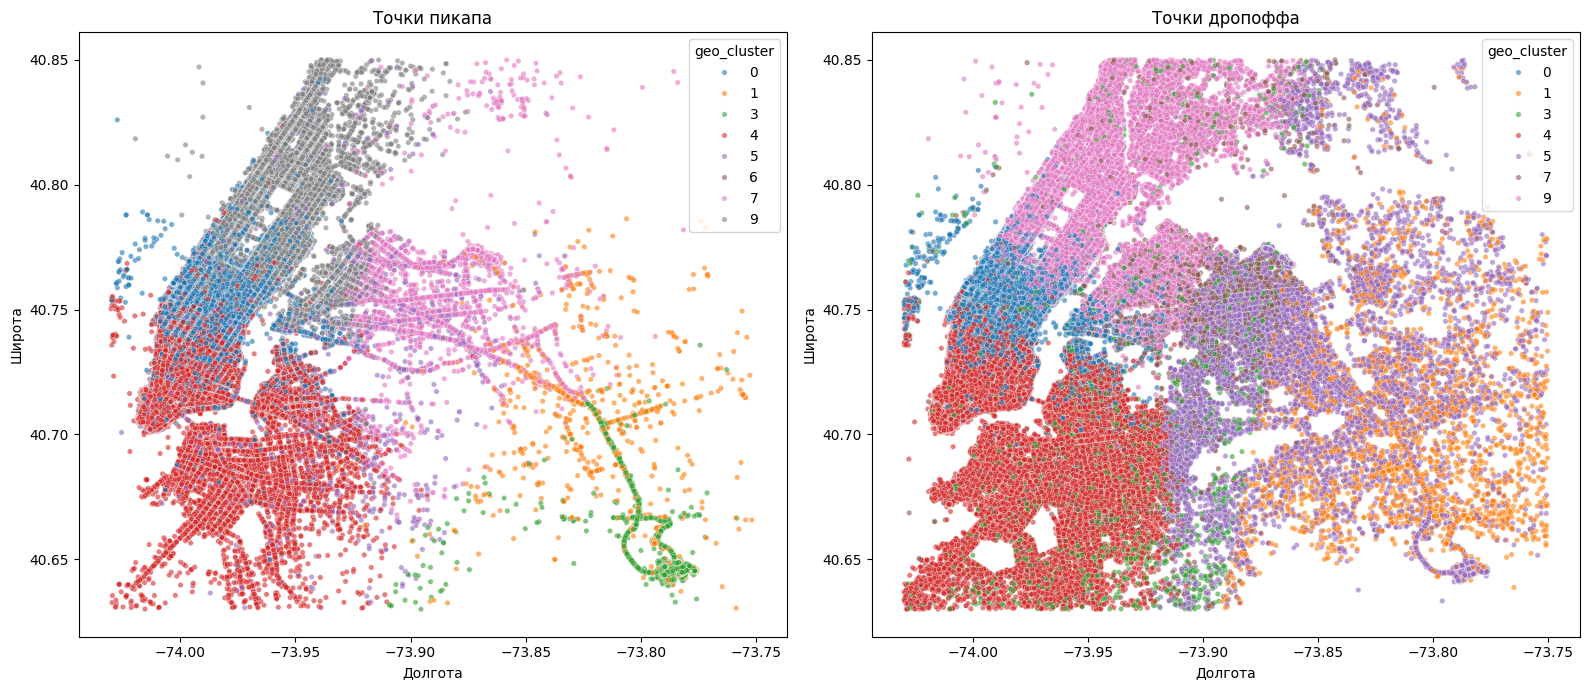

In [ ]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

# Маска для точек пикапа внутри границ города
pickup_mask = (
    (taxi_data['pickup_longitude'] >= city_long_border[0]) &
    (taxi_data['pickup_longitude'] <= city_long_border[1]) &
    (taxi_data['pickup_latitude'] >= city_lat_border[0]) &
    (taxi_data['pickup_latitude'] <= city_lat_border[1])
)
filtered_pickup = taxi_data[pickup_mask]

# Маска для точек дропоффа внутри границ города
dropoff_mask = (
    (taxi_data['dropoff_longitude'] >= city_long_border[0]) &
    (taxi_data['dropoff_longitude'] <= city_long_border[1]) &
    (taxi_data['dropoff_latitude'] >= city_lat_border[0]) &
    (taxi_data['dropoff_latitude'] <= city_lat_border[1])
)
filtered_dropoff = taxi_data[dropoff_mask]

# Создаем фигуру с двумя графиками
plt.figure(figsize=(16, 7))

# График пикапов
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=filtered_pickup,
    x='pickup_longitude',
    y='pickup_latitude',
    hue='geo_cluster',  
    palette='tab10',
    s=15,               
    alpha=0.6
)
plt.title("Точки пикапа")
plt.xlabel("Долгота")
plt.ylabel("Широта")

# График дропоффов
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=filtered_dropoff,
    x='dropoff_longitude',
    y='dropoff_latitude',
    hue='geo_cluster',  
    palette='tab10',
    s=15,
    alpha=0.6
)
plt.title("Точки дропоффа")
plt.xlabel("Долгота")
plt.ylabel("Широта")

plt.tight_layout()
plt.show()

## 4. Отбор и преобразование признаков

Перед тем как перейти к построению модели, осталось сделать ещё несколько шагов.
* Следует помнить, что многие алгоритмы машинного обучения не могут обрабатывать категориальные признаки в их обычном виде. Поэтому нам необходимо их закодировать;
* Надо отобрать признаки, которые мы будем использовать для обучения модели;
*  Необходимо масштабировать и трансформировать некоторые признаки для того, чтобы улучшить сходимость моделей, в основе которых лежат численные методы.


In [ ]:
print('Shape of data: {}'.format(taxi_data.shape))
print('Columns: {}'.format(taxi_data.columns))

Shape of data: (1458233, 27)
Columns: Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_date', 'pickup_hour', 'pickup_day_of_week',
       'pickup_holiday', 'total_distance', 'total_travel_time',
       'number_of_steps', 'haversine_distance', 'direction', 'geo_cluster',
       'temperature', 'visibility', 'wind speed', 'precip', 'events',
       'trip_duration_log'],
      dtype='object')


Для удобства работы сделаем копию исходной таблицы с поездками:

In [ ]:
train_data = taxi_data.copy()
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,number_of_steps,haversine_distance,direction,geo_cluster,temperature,visibility,wind speed,precip,events,trip_duration_log
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-74,41,-74,41,N,...,5,1,100,9,4,8,28,0,None,6
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-74,41,-74,41,N,...,6,2,-117,4,29,16,7,0,None,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-74,41,-74,41,N,...,16,6,-160,4,-7,16,24,0,None,8
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74,41,-74,41,N,...,4,1,-173,4,7,16,26,0,None,6
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-74,41,-74,41,N,...,5,1,179,9,9,16,9,0,None,6


### Задание 4.1.
Сразу позаботимся об очевидных неинформативных и избыточных признаках. 

а) Какой из признаков является уникальным для каждой поездки и не несет полезной информации в определении ее продолжительности?

б) Утечка данных (data leak) - это…

в) Подумайте, наличие какого из признаков в обучающем наборе данных создает утечку данных?

г) Исключите выбранные в пунктах а) и в) признаки из исходной таблицы с данными. Сколько столбцов в таблице у вас осталось?


In [ ]:
# ваш код здесь
train_data = train_data.drop(columns=['id', 'dropoff_datetime'])
train_data.shape[1]

25

Ранее мы извлекли всю необходимую для нас информацию из даты начала поездки, теперь мы можем избавиться от этих признаков, так как они нам больше не понадобятся:


In [ ]:
drop_columns = ['pickup_datetime', 'pickup_date']
train_data = train_data.drop(drop_columns, axis=1)
print('Shape of data:  {}'.format(train_data.shape))

Shape of data:  (1458233, 23)


### Задание 4.2.

Закодируйте признак vendor_id в таблице train_data таким образом, чтобы он был равен 0, если идентификатор таксопарка равен 1, и 1 — в противном случае.

Закодируйте признак store_and_fwd_flag в таблице train_data таким образом, чтобы он был равен 0, если флаг выставлен в значение 'N', и 1 — в противном случае.

а) Рассчитайте среднее по закодированному столбцу vendor_id. Ответ приведите с точностью до сотых.

б) Рассчитайте среднее по закодированному столбцу store_and_fwd_flag. Ответ приведите с точностью до тысячных.



In [ ]:
# ваш код здесь
train_data['vendor_id'] = train_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)
train_data['store_and_fwd_flag'] = train_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)

print(round(train_data['vendor_id'].mean(), 2))
print(round(train_data['store_and_fwd_flag'].mean(), 3))

0.53
0.006


### Задание 4.3.
Создайте таблицу data_onehot из закодированных однократным кодированием признаков pickup_day_of_week, geo_cluster и events в таблице train_data с помощью OneHotEncoder из библиотеки sklearn. Параметр drop выставите в значение 'first', чтобы удалять первый бинарный столбец, тем самым не создавая излишних признаков.

В параметре handle_unknown установите значение 'ignore'. Это позволит коду отработать без ошибок в случае появления в тестовой выборке значений, отсутствующих в обучающей выборке.

В результате работы OneHotEncoder вы получите безымянный numpy-массив, который нам будет необходимо преобразовать обратно в DataFrame, для более удобной работы в дальнейшем. Чтобы получить имена закодированных столбцов у объекта типа OneHotEncoder есть специальный метод get_feature_names_out(). Он возвращает список новых закодированных имен столбцов в формате <оригинальное имя столбца>_<имя категории>.

Пример использования:

``` python
# Объявляем кодировщик
one_hot_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
# Получаем закодированные имена столбцов
column_names = one_hot_encoder.get_feature_names_out()
# Составляем DataFrame из закодированных признаков
data_onehot = pd.DataFrame(data_onehot, columns=column_names)
```

В этом псевдокоде:
* one_hot_encoder - объект класса OneHotEncoder
* data_onehot - numpy-массив, полученный в результате трансформации кодировщиком

В результате выполнения задания у вас должен быть образован DataFrame `data_onehot`, который содержит кодированные категориальные признаки pickup_day_of_week, geo_cluster и events. 


Сколько бинарных столбцов у вас получилось сгенерировать с помощью однократного кодирования?


In [ ]:
# ваш код здесь
one_hot_encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
data_onehot = one_hot_encoder.fit_transform(train_data[['pickup_day_of_week', 'geo_cluster', 'events']])
columns_to_change = one_hot_encoder.get_feature_names_out()
data_onehot = pd.DataFrame(data_onehot, columns=columns_to_change)

data_onehot.shape

(1458233, 18)

In [ ]:
train_data.shape

(1458233, 23)

Добавим полученную таблицу с закодированными признаками:

In [ ]:
train_data = pd.concat(
    [
        train_data.drop(['pickup_day_of_week', 'geo_cluster', 'events'], axis=1).reset_index(drop=True),
        data_onehot
    ],
    axis=1
)
print('Shape of data: {}'.format(train_data.shape))

Shape of data: (1458233, 38)


In [ ]:
train_data.pickup_holiday = train_data.pickup_holiday.astype(int)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458233 entries, 0 to 1458232
Data columns (total 38 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   vendor_id             1458233 non-null  int64  
 1   passenger_count       1458233 non-null  int64  
 2   pickup_longitude      1458233 non-null  float64
 3   pickup_latitude       1458233 non-null  float64
 4   dropoff_longitude     1458233 non-null  float64
 5   dropoff_latitude      1458233 non-null  float64
 6   store_and_fwd_flag    1458233 non-null  int64  
 7   trip_duration         1458233 non-null  int64  
 8   pickup_hour           1458233 non-null  int64  
 9   pickup_holiday        1458233 non-null  int64  
 10  total_distance        1458233 non-null  float64
 11  total_travel_time     1458233 non-null  float64
 12  number_of_steps       1458233 non-null  float64
 13  haversine_distance    1458233 non-null  float64
 14  direction             1458233 non-

Теперь, когда категориальные признаки предобработаны, сформируем матрицу наблюдений X, вектор целевой переменной y и его логарифм y_log. В матрицу наблюдений войдут все столбцы из таблицы с поездками за исключением целевого признака trip_duration и его логарифмированной версии trip_duration_log:


In [ ]:
X = train_data.drop(['trip_duration', 'trip_duration_log'], axis=1)
y = train_data['trip_duration']
y_log = train_data['trip_duration_log']

Все наши модели мы будем обучать на логарифмированной версии y_log. 

Выбранный тип валидации - hold-out. Разобьем выборку на обучающую и валидационную в соотношении 67/33:

In [ ]:
X_train, X_valid, y_train_log, y_valid_log = model_selection.train_test_split(
    X, y_log, 
    test_size=0.33, 
    random_state=42
)

На данный момент у нас достаточно много признаков: скорее всего, не все из них будут важны. Давайте оставим лишь те, которые сильнее всего связаны с целевой переменной и точно будут вносить вклад в повышение качества модели.


### Задание 4.4.
С помощью SelectKBest отберите 25 признаков, наилучшим образом подходящих для предсказания целевой переменной в логарифмическом масштабе. Отбор реализуйте по обучающей выборке, используя параметр score_func = f_regression.

Укажите признаки, которые вошли в список отобранных


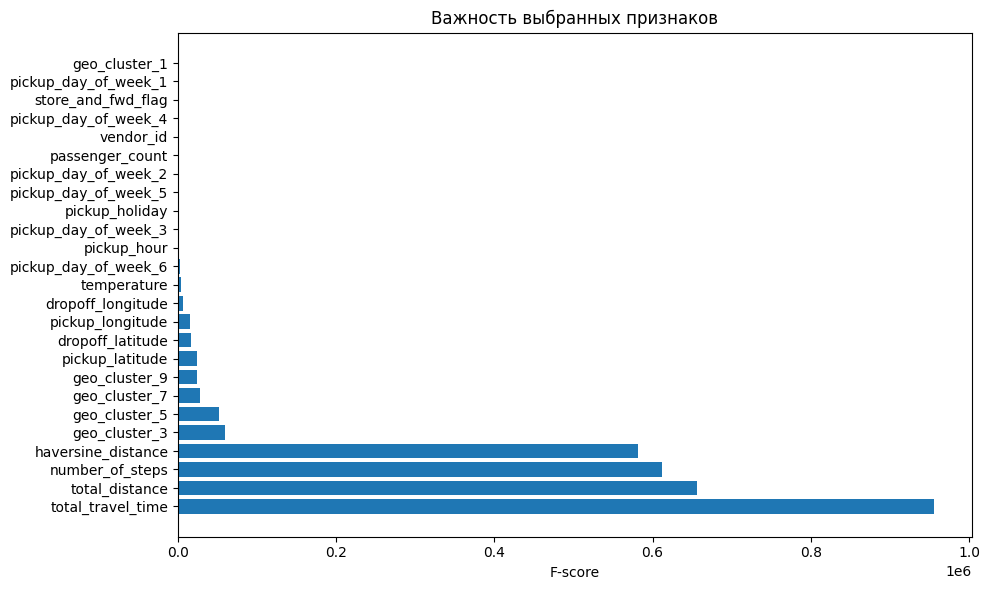

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

kbest = SelectKBest(score_func=f_regression, k=25)
kbest.fit(X_train, y_train_log)

X_train_kbest = kbest.transform(X_train)
X_valid_kbest = kbest.transform(X_valid)

selected_columns = X_train.columns[kbest.get_support()]
f_scores = kbest.scores_[kbest.get_support()]

feature_scores = pd.DataFrame({
    'feature': selected_columns,
    'f_score': f_scores
})

feature_scores = feature_scores.sort_values(by='f_score', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_scores['feature'], feature_scores['f_score'])
plt.xlabel('F-score')
plt.title('Важность выбранных признаков')
plt.tight_layout()
plt.show()

Так как мы будем использовать различные модели, в том числе внутри которых заложены численные методы оптимизации, то давайте заранее позаботимся о масштабировании факторов. 


### Задание 4.5.
Нормализуйте предикторы в обучающей и валидационной выборках с помощью MinMaxScaler из библиотеки sklearn. Помните, что обучение нормализатора производится на обучающей выборке, а трансформация на обучающей и валидационной!

Рассчитайте среднее арифметическое для первого предиктора (т. е. для первого столбца матрицы) из валидационной выборки. Ответ округлите до сотых.


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_kbest)

X_train_scaled = scaler.transform(X_train_kbest)
X_valid_scaled = scaler.transform(X_valid_kbest)

print(round(X_valid_scaled[:, 0].mean(), 2))

0.54


In [ ]:
# Преобразуем X_train_kbest в DataFrame
X_train_kbest_df = pd.DataFrame(X_train_kbest, columns=selected_columns, index=X_train.index)

# Преобразуем X_valid_kbest в DataFrame
X_valid_kbest_df = pd.DataFrame(X_valid_kbest, columns=selected_columns, index=X_valid.index)

X_train_kbest_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 977016 entries, 293850 to 121958
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   vendor_id             977016 non-null  float64
 1   passenger_count       977016 non-null  float64
 2   pickup_longitude      977016 non-null  float64
 3   pickup_latitude       977016 non-null  float64
 4   dropoff_longitude     977016 non-null  float64
 5   dropoff_latitude      977016 non-null  float64
 6   store_and_fwd_flag    977016 non-null  float64
 7   pickup_hour           977016 non-null  float64
 8   pickup_holiday        977016 non-null  float64
 9   total_distance        977016 non-null  float64
 10  total_travel_time     977016 non-null  float64
 11  number_of_steps       977016 non-null  float64
 12  haversine_distance    977016 non-null  float64
 13  temperature           977016 non-null  float64
 14  pickup_day_of_week_1  977016 non-null  float64
 15  

In [ ]:
X_valid_kbest_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 481217 entries, 452652 to 1108352
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   vendor_id             481217 non-null  float64
 1   passenger_count       481217 non-null  float64
 2   pickup_longitude      481217 non-null  float64
 3   pickup_latitude       481217 non-null  float64
 4   dropoff_longitude     481217 non-null  float64
 5   dropoff_latitude      481217 non-null  float64
 6   store_and_fwd_flag    481217 non-null  float64
 7   pickup_hour           481217 non-null  float64
 8   pickup_holiday        481217 non-null  float64
 9   total_distance        481217 non-null  float64
 10  total_travel_time     481217 non-null  float64
 11  number_of_steps       481217 non-null  float64
 12  haversine_distance    481217 non-null  float64
 13  temperature           481217 non-null  float64
 14  pickup_day_of_week_1  481217 non-null  float64
 15 

## 5. Решение задачи регрессии: линейная регрессия и деревья решений

Определим метрику, по которой мы будем измерять качество наших моделей. Мы будем следовать канонам исходного соревнования на Kaggle и в качестве метрики использовать RMSLE (Root Mean Squared Log Error), которая вычисляется как:
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(log(y_i+1)-log(\hat{y_i}+1))^2},$$
где:
* $y_i$ - истинная длительность i-ой поездки на такси (trip_duration)
* $\hat{y_i}$- предсказанная моделью длительность i-ой поездки на такси

Заметим, что логарифмирование целевого признака мы уже провели заранее, поэтому нам будет достаточно вычислить метрику RMSE для модели, обученной прогнозировать длительность поездки такси в логарифмическом масштабе:
$$z_i=log(y_i+1),$$
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(z_i-\hat{z_i})^2}=\sqrt{MSE(z_i,\hat{z_i})}$$ 



### Задание 5.1.
Постройте модель линейной регрессии на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr_def = LinearRegression()

lr_def.fit(X_train_scaled, y_train_log)

y_train_log_pred = lr_def.predict(X_train_scaled)
y_valid_log_pred = lr_def.predict(X_valid_scaled)

print(f'rmsle на train: {np.sqrt(metrics.mean_squared_error(y_train_log, y_train_log_pred)):.2f}')
print(f'rmsle на valid: {np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_log_pred)):.2f}')

rmsle на train: 0.54
rmsle на valid: 0.54


### Задание 5.2.
Сгенерируйте полиномиальные признаки 2-ой степени с помощью PolynomialFeatures из библиотеки sklearn. Параметр include_bias выставите в значение False.

Постройте модель полиномиальной регрессии 2-ой степени на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = poly.fit_transform(X_train_scaled)
X_valid_poly = poly.transform(X_valid_scaled)

lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train_log)

y_train_log_pred = lr_poly.predict(X_train_poly)
y_valid_log_pred = lr_poly.predict(X_valid_poly)

print(f'rmsle на train: {np.sqrt(metrics.mean_squared_error(y_train_log, y_train_log_pred)):.2f}')
print(f'rmsle на valid: {np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_log_pred)):.2f}')

rmsle на train: 0.47
rmsle на valid: 0.70


### Задание 5.3.
Постройте модель полиномиальной регрессии 2-ой степени с L2-регуляризацией (регуляризация по Тихонову) на обучающей выборке  (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Коэффициент регуляризации $\alpha$ установите равным 1, остальные параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [ ]:
from sklearn.linear_model import Ridge

ridge_poly = Ridge(alpha=1)
ridge_poly.fit(X_train_poly, y_train_log)

y_train_log_pred = ridge_poly.predict(X_train_poly)
y_valid_log_pred = ridge_poly.predict(X_valid_poly)

print(f'rmsle на train: {np.sqrt(metrics.mean_squared_error(y_train_log, y_train_log_pred)):.2f}')
print(f'rmsle на valid: {np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_log_pred)):.2f}')

rmsle на train: 0.48
rmsle на valid: 0.48


### Задание 5.4.
Постройте модель дерева решений (DecisionTreeRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию. 

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train_log)

y_train_log_pred = dt.predict(X_train_scaled)
y_valid_log_pred = dt.predict(X_valid_scaled)

print(f'rmsle на train: {np.sqrt(metrics.mean_squared_error(y_train_log, y_train_log_pred)):.2f}')
print(f'rmsle на valid: {np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_log_pred)):.2f}')

rmsle на train: 0.00
rmsle на valid: 0.57


### Задание 5.5.
Переберите все возможные варианты глубины дерева решений в диапазоне от 7 до 20:

max_depths = range(7, 20)

Параметр random_state задайте равным 42.

Постройте линейные графики изменения метрики RMSE на тренировочной и валидационной выборках в зависимости от значения параметра глубины дерева решений. 

а) Найдите оптимальное значение максимальной глубины дерева, для которой будет наблюдаться минимальное значение RMSLE на обучающей выборке, но при этом еще не будет наблюдаться переобучение (валидационная кривая еще не начинает возрастать).

б) Чему равно значение метрик RMSLE на тренировочной и валидационной выборках для дерева решений с выбранной оптимальной глубиной? Ответ округлите до сотых.


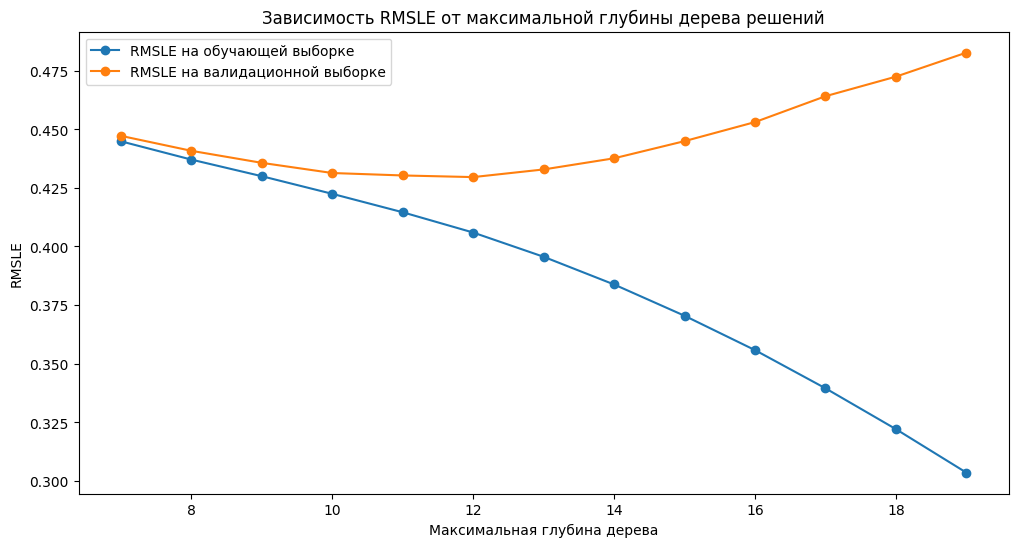

In [ ]:
max_depth = range(7, 20)
rmsle_train_list = []
rmsle_valid_list = []

for depth in max_depth:
    dt = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dt.fit(X_train_scaled, y_train_log)

    y_train_log_pred = dt.predict(X_train_scaled)
    y_valid_log_pred = dt.predict(X_valid_scaled)
    
    rmsle_train = np.sqrt(mean_squared_error(y_train_log, y_train_log_pred))
    rmsle_valid = np.sqrt(mean_squared_error(y_valid_log, y_valid_log_pred))
    
    rmsle_train_list.append(rmsle_train)
    rmsle_valid_list.append(rmsle_valid)
    
plt.figure(figsize=(12, 6))
plt.plot(max_depth, rmsle_train_list, label='RMSLE на обучающей выборке', marker='o')
plt.plot(max_depth, rmsle_valid_list, label='RMSLE на валидационной выборке', marker='o')
plt.xlabel('Максимальная глубина дерева')
plt.ylabel('RMSLE')
plt.title('Зависимость RMSLE от максимальной глубины дерева решений')
plt.legend()
plt.show()

In [ ]:
dt = DecisionTreeRegressor(random_state=42, max_depth=12)
dt.fit(X_train_scaled, y_train_log)

y_train_log_pred = dt.predict(X_train_scaled)
y_valid_log_pred = dt.predict(X_valid_scaled)

print(f'rmsle на train: {np.sqrt(metrics.mean_squared_error(y_train_log, y_train_log_pred)):.2f}')
print(f'rmsle на valid: {np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_log_pred)):.2f}')

rmsle на train: 0.41
rmsle на valid: 0.43


## 6. Решение задачи регрессии: ансамблевые методы и построение прогноза

Переходим к тяжелой артиллерии: ансамблевым алгоритмам. 

### Задание 6.1.

Постройте модель случайного леса на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* n_estimators=200,
* max_depth=12,
* criterion='squared_error',
* min_samples_split=20,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [ ]:
# ваш код здесь
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200, max_depth=12, criterion='squared_error', min_samples_split=20, random_state=42)
rf.fit(X_train_scaled, y_train_log)
y_train_log_pred = rf.predict(X_train_scaled)
y_valid_log_pred = rf.predict(X_valid_scaled)
print(f'rmsle на train: {np.sqrt(metrics.mean_squared_error(y_train_log, y_train_log_pred)):.2f}')
print(f'rmsle на valid: {np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_log_pred)):.2f}')

RandomForestRegressor(max_depth=12, min_samples_split=20, n_estimators=200,
                      random_state=42)

### Задание 6.2.
Постройте модель градиентного бустинга над деревьями решений (GradientBoostingRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* learning_rate=0.5,
* n_estimators=100,
* max_depth=6, 
* min_samples_split=30,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [ ]:
# ваш код здесь
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(learning_rate=0.5, n_estimators=100, max_depth=6, min_samples_split=30, random_state=42)
gb.fit(X_train_scaled, y_train_log)
y_train_log_pred = gb.predict(X_train_scaled)
y_valid_log_pred = gb.predict(X_valid_scaled)
print(f'rmsle на train: {np.sqrt(metrics.mean_squared_error(y_train_log, y_train_log_pred)):.2f}')
print(f'rmsle на valid: {np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_log_pred)):.2f}')

rmsle на train: 0.37
rmsle на valid: 0.39


### Задание 6.3.
Какая из построенных вами моделей показала наилучший результат (наименьшее значение RMSLE на валидационной выборке)?
* Линейная регрессия
* Полиномиальная регрессия 2ой степени
* Дерево решений
* Случайный лес
* Градиентный бустинг над деревьями решений


### Задание 6.4.
Постройте столбчатую диаграмму коэффициентов значимости каждого из факторов.

Укажите топ-3 наиболее значимых для предсказания целевого признака - длительности поездки в логарифмическом масштабе - факторов.


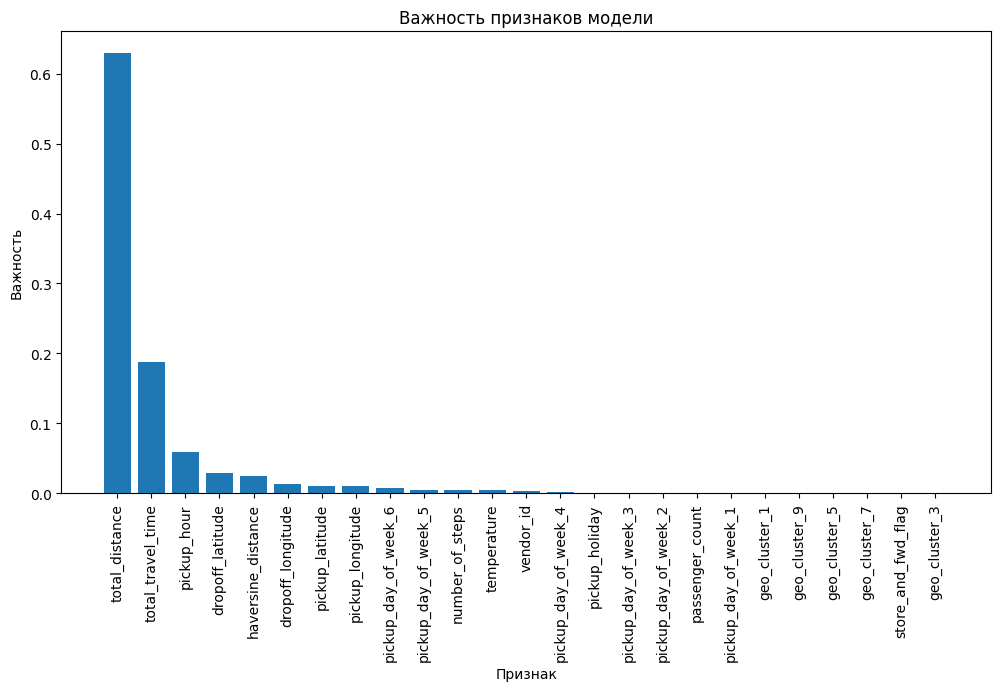

In [ ]:
# ваш код здесь
importances = gb.feature_importances_

feature_importances_df = pd.DataFrame({
    'features': X_train_kbest_df.columns,
    'importances': importances
}).sort_values(by='importances', ascending=False)

plt.figure(figsize=(12,6))
plt.bar(feature_importances_df['features'], feature_importances_df['importances'])
plt.xticks(rotation=90)
plt.xlabel('Признак')
plt.ylabel('Важность')
plt.title('Важность признаков модели')
plt.show()

### Задание 6.5.
Для лучшей из построенных моделей рассчитайте медианную абсолютную ошибку (MeAE - в sklearn функция median_absolute_error) предсказания длительности поездки такси на валидационной выборке:
$$ MeAE = median(|y_i-\hat{y_i}|)$$

Значение метрики MeAE переведите в минуты и округлите до десятых.


In [ ]:
from sklearn.metrics import median_absolute_error
y_valid = np.exp(y_valid_log) - 1
y_valid_pred = np.exp(y_valid_log_pred) - 1
meae = median_absolute_error(y_valid, y_valid_pred)
print(round(meae/60, 1))

1.8


Финальный шаг - сделать submit -  предсказание для отложенного тестового набора данных. 

Прочитаем тестовые данные и заранее выделим столбец с идентификаторами поездок из тестового набора данных. Он нам еще пригодится:


In [ ]:
test_data = pd.read_csv("~/Desktop/Projects/NY_Taxi_Trip_Duration/data/Project5_test_data.csv")
osrm_data_test = pd.read_csv("~/Desktop/Projects/NY_Taxi_Trip_Duration/data/Project5_osrm_data_test.csv")
test_id = test_data['id']

In [ ]:
test_data.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-74,41,-74,41,N
1,id3505355,1,2016-06-30 23:59:53,1,-74,41,-74,41,N
2,id1217141,1,2016-06-30 23:59:47,1,-74,41,-74,41,N
3,id2150126,2,2016-06-30 23:59:41,1,-74,41,-74,41,N
4,id1598245,1,2016-06-30 23:59:33,1,-74,41,-74,41,N


In [ ]:
osrm_data_test.head()

,id,starting_street,end_street,total_distance,total_travel_time,number_of_steps,street_for_each_step,distance_per_step,travel_time_per_step,step_maneuvers,step_direction,step_location_list
0,id0771704,6th Avenue,10th Avenue,1497,200,7,6th Avenue|West 17th Street|9th Avenue|9th Ave...,188.7|825.1|96.4|58.6|267.5|60.7|0,32.4|103.7|12.7|10.7|34|6.7|0,depart|turn|turn|continue|turn|turn|arrive,left|left|left|slight right|right|right|arrive,"-73.996527,40.737786|-73.995446,40.739272|-74...."
1,id3274209,5th Avenue,5th Avenue,1427,142,2,5th Avenue|5th Avenue,1427.1|0,141.5|0,depart|arrive,none|arrive,"-73.976974,40.75885|-73.98516,40.747618"
2,id2756455,East 18th Street,Park Avenue,2312,325,9,East 18th Street|Irving Place|East 19th Street...,19.3|74.1|148.9|632.1|163.9|1111.5|144.7|17.7|0,9.6|15.6|20.7|92.1|24.4|136.2|24.9|1.1|0,depart|turn|turn|turn|turn|turn|turn|turn|arrive,left|left|left|right|left|right|right|right|ar...,"-73.987161,40.736551|-73.986961,40.736466|-73...."
3,id3684027,Madison Avenue,6th Avenue,932,84,4,Madison Avenue|East 49th Street|6th Avenue|6th...,199.3|466.6|265.8|0,24.4|36.5|23.3|0,depart|turn|turn|arrive,right|left|right|arrive,"-73.977191,40.755664|-73.976045,40.757232|-73...."
4,id3101285,Madison Avenue,West 83rd Street,2502,295,8,Madison Avenue|East 91st Street|5th Avenue|86t...,31|154.9|491|907.6|272.1|248|397.2|0,9.4|29.7|46|103.6|25.1|21.8|59.1|0,depart|turn|turn|turn|new name|turn|turn|arrive,right|left|left|right|straight|left|right|arrive,"-73.956667,40.783797|-73.956489,40.784041|-73...."


Перед созданием прогноза для тестовой выборки необходимо произвести все манипуляции с данными, которые мы производили с тренировочной выборкой, а именно:
* Перевести признак pickup_datetime в формат datetime;
* Добавить новые признаки (временные, географические, погодные и другие факторы);
* Произвести очистку данных от пропусков;
* Произвести кодировку категориальных признаков:
    * Закодировать бинарные признаки;
    * Закодировать номинальные признаки с помощью обученного на тренировочной выборке OneHotEncoder’а;
* Сформировать матрицу наблюдений, оставив в таблице только те признаки, которые были отобраны с помощью SelectKBest;
* Нормализовать данные с помощью обученного на тренировочной выборке MinMaxScaler’а.


Только после выполнения всех этих шагов можно сделать предсказание длительности поездки для тестовой выборки. Не забудьте перевести предсказания из логарифмического масштаба в истинный, используя формулу:
$$y_i=exp(z_i)-1$$

После того, как вы сформируете предсказание длительности поездок на тестовой выборке вам необходимо будет создать submission-файл в формате csv, отправить его на платформу Kaggle и посмотреть на результирующее значение метрики RMSLE на тестовой выборке.

Код для создания submission-файла:


In [ ]:
test_data['pickup_datetime'] = pd.to_datetime(taxi_data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')

In [ ]:
# Или заполнить, например, медианой времени
median_datetime = test_data['pickup_datetime'].median()
test_data['pickup_datetime'] = test_data['pickup_datetime'].fillna(median_datetime)

In [ ]:
print(test_data['pickup_datetime'].isna().sum())

0


In [ ]:
test_data = add_datetime_features(test_data)
test_data = add_holiday_features(test_data, holiday_data)
test_data = add_osrm_features(test_data, osrm_data_test)
test_data = add_geographical_features(test_data)
test_data = add_cluster_features(test_data, kmeans)
test_data = add_weather_features(test_data, weather_data)
test_data = fill_null_weather_data (test_data)
test_data['vendor_id'] = test_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)
test_data['store_and_fwd_flag'] = test_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  625134 non-null  object        
 1   vendor_id           625134 non-null  int64         
 2   pickup_datetime     625134 non-null  datetime64[ns]
 3   passenger_count     625134 non-null  int64         
 4   pickup_longitude    625134 non-null  float64       
 5   pickup_latitude     625134 non-null  float64       
 6   dropoff_longitude   625134 non-null  float64       
 7   dropoff_latitude    625134 non-null  float64       
 8   store_and_fwd_flag  625134 non-null  int64         
 9   pickup_date         625134 non-null  object        
 10  pickup_hour         625134 non-null  int64         
 11  pickup_day_of_week  625134 non-null  int32         
 12  pickup_holiday      625134 non-null  bool          
 13  total_distance      625134 no

In [ ]:
columns_to_change = ['pickup_day_of_week', 'geo_cluster', 'events']

# на test только transform
test_data_onehot = one_hot_encoder.transform(test_data[columns_to_change])

# названия колонок
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
test_data_onehot = pd.DataFrame(test_data_onehot, columns=column_names)

# объединяем с test_data
test_data = pd.concat(
    [test_data.drop(columns_to_change, axis=1).reset_index(drop=True), test_data_onehot], 
    axis=1
)

In [ ]:
X_test = test_data[selected_columns]
X_test_scaled = scaler.transform(X_test)

/Users/rodinilya/Desktop/Projects/NY_Taxi_Trip_Duration/taxi_env/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [ ]:
y_test_pred_log = gb.predict(X_test_scaled)
y_test_predict = np.exp(y_test_pred_log) - 1
y_test_predict

array([ 987.52570613,  582.41254898,  513.40655648, ..., 1834.78131427,
       1889.62177151, 1398.05371472])

In [ ]:
# ваш код здесь
submission = pd.DataFrame({'id': test_id, 'trip_duration': y_test_predict})
submission.to_csv('data/submission_gb.csv', index=False)

### **В качестве бонуса**

В завершение по ансамблевым мы предлагаем вам попробовать улучшить свое предсказание, воспользовавшись моделью экстремального градиентного бустинга (XGBoost) из библиотеки xgboost.

**XGBoost** - современная модель машинного обучения, которая является продолжением идеи градиентного бустинга Фридмана. У нее есть несколько преимуществ по сравнению с классической моделью градиентного бустинга из библиотеки sklearn: повышенная производительность путем параллелизации процесса обучения, повышенное качество решения за счет усовершенствования алгоритма бустинга, меньшая склонность к переобучению и широкий функционал возможности управления параметрами модели.


Для ее использования необходимо для начала установить пакет xgboost:

После чего модуль можно импортировать:

In [ ]:
import xgboost as xgb

Перед обучением модели необходимо перевести наборы данных в тип данных xgboost.DMatrix:

In [ ]:
# Создание матриц наблюдений в формате DMatrix
dtrain = xgb.DMatrix(X_train_scaled, label=y_train_log, feature_names=list(selected_columns))
dvalid = xgb.DMatrix(X_valid_scaled, label=y_valid_log, feature_names=list(selected_columns))
dtest = xgb.DMatrix(X_test_scaled, feature_names=list(selected_columns))

Обучение модели XGBoost происходит с помощью метода train, в который необходимо передать параметры модели, набор данных, количество базовых моделей в ансамбле, а также дополнительные параметры:


In [ ]:
# Гиперпараметры модели
xgb_pars = {'min_child_weight': 20, 'eta': 0.1, 'colsample_bytree': 0.9, 
            'max_depth': 6, 'subsample': 0.9, 'lambda': 1, 'nthread': -1, 
            'booster' : 'gbtree', 'eval_metric': 'rmse', 'objective': 'reg:squarederror'
           }
# Тренировочная и валидационная выборка
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
# Обучаем модель XGBoost
model = xgb.train(
    params=xgb_pars, #гиперпараметры модели
    dtrain=dtrain, #обучающая выборка
    num_boost_round=300, #количество моделей в ансамбле
    evals=watchlist, #выборки, на которых считается матрица
    early_stopping_rounds=20, #раняя остановка
    maximize=False, #смена поиска максимума на минимум
    verbose_eval=10 #шаг, через который происходит отображение метрик
)

[0]	train-rmse:0.74154	valid-rmse:0.74355
[10]	train-rmse:0.49217	valid-rmse:0.49478
[20]	train-rmse:0.44036	valid-rmse:0.44325
[30]	train-rmse:0.42603	valid-rmse:0.42916
[40]	train-rmse:0.41877	valid-rmse:0.42209
[50]	train-rmse:0.41374	valid-rmse:0.41732
[60]	train-rmse:0.40933	valid-rmse:0.41321
[70]	train-rmse:0.40677	valid-rmse:0.41095
[80]	train-rmse:0.40424	valid-rmse:0.40872
[90]	train-rmse:0.40212	valid-rmse:0.40686
[100]	train-rmse:0.40056	valid-rmse:0.40563
[110]	train-rmse:0.39892	valid-rmse:0.40429
[120]	train-rmse:0.39768	valid-rmse:0.40333
[130]	train-rmse:0.39662	valid-rmse:0.40250
[140]	train-rmse:0.39551	valid-rmse:0.40166
[150]	train-rmse:0.39405	valid-rmse:0.40045
[160]	train-rmse:0.39289	valid-rmse:0.39950
[170]	train-rmse:0.39193	valid-rmse:0.39885
[180]	train-rmse:0.39115	valid-rmse:0.39839
[190]	train-rmse:0.39051	valid-rmse:0.39808
[200]	train-rmse:0.38984	valid-rmse:0.39773
[210]	train-rmse:0.38918	valid-rmse:0.39731
[220]	train-rmse:0.38839	valid-rmse:0.39686

Предсказать целевой признак на новых данных можно с помощью метода predict():

In [ ]:
#Делаем предсказание на тестовом наборе данных
y_test_predict = np.exp(model.predict(dtest)) - 1
print('Modeling RMSLE %.5f' % model.best_score)

Modeling RMSLE 0.39427


Также как и все модели, основанные на использовании деревьев решений в качестве базовых моделей, XGBoost имеет возможность определения коэффициентов важности факторов. Более того, в библиотеку встроена возможность визуализации важность факторов в виде столбчатой диаграммы. За эту возможность отвечает функция plot_importance():


<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

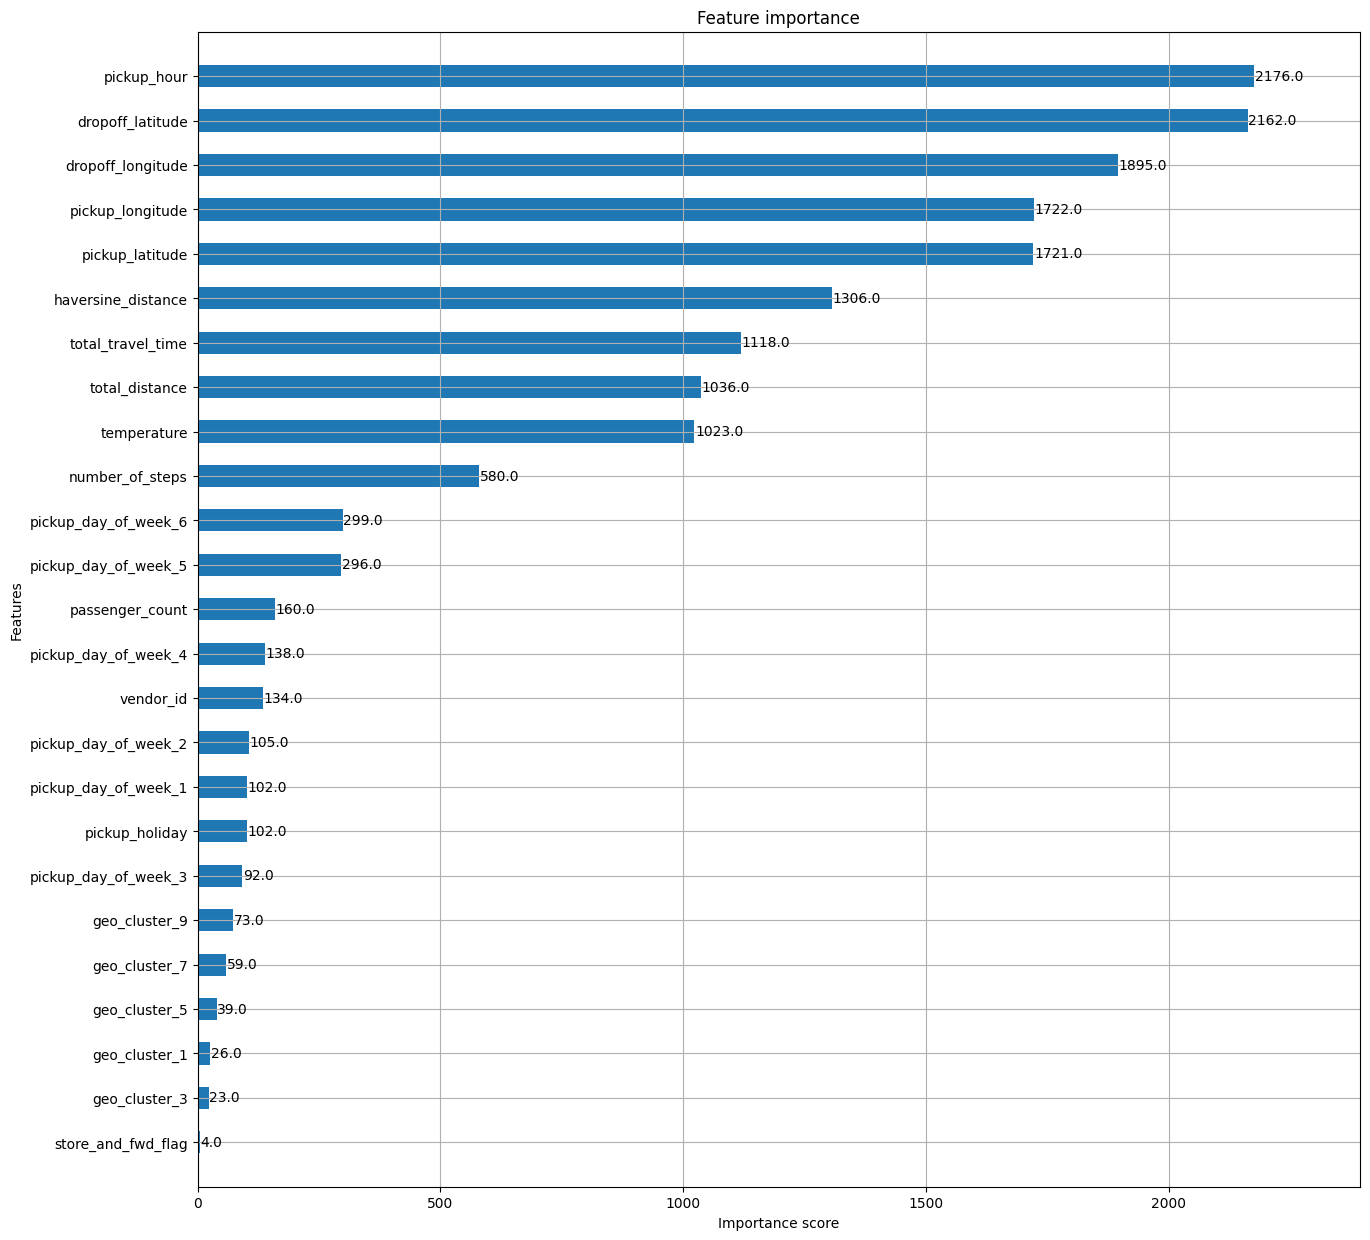

In [ ]:
fig, ax = plt.subplots(figsize = (15,15))
xgb.plot_importance(model, ax = ax, height=0.5)

###  Анализ важности признаков (Feature Importance)

На графике представлена оценка значимости признаков, полученная из модели `RandomForestRegressor`.  

Основные выводы:
- Наибольшее влияние на прогноз длительности поездки оказывают **время начала поездки (`pickup_hour`)** и **географические координаты начала и конца поездки (`pickup_latitude`, `pickup_longitude`, `dropoff_latitude`, `dropoff_longitude`)**.  
  Это логично, поскольку расстояние и время суток напрямую определяют длительность поездки.
- Признак **`haversine_distance`** (расстояние между точками по координатам) также имеет высокий вклад, подтверждая, что именно дистанция является ключевым фактором.
- Важную роль играют показатели, связанные с условиями поездки — **температура**, **общее время в пути** и **количество шагов маршрута (`number_of_steps`)**.  
  Это говорит о том, что погодные и маршрутные особенности влияют на время поездки.
- Менее значимыми оказались категориальные признаки, такие как **день недели** или **праздничные дни**, — они влияют косвенно, отражая лишь частичные изменения трафика.

📈 **Итог:**  
Модель в основном ориентируется на пространственно-временные признаки — место, время и расстояние — что подтверждает корректность выбранных факторов и адекватность работы алгоритма.

##  Итоговый вывод по проекту

В рамках проекта решена задача **прогнозирования длительности поездки такси в Нью-Йорке** с помощью методов машинного обучения.

### 🔹 Этапы работы:
1. **Подготовка данных:**  
   - проведена очистка данных от выбросов и пропусков;  
   - добавлены признаки: расстояние поездки, день недели, час отправления, а также преобразованы координаты;  
   - данные нормализованы и подготовлены к обучению моделей.

2. **Исследовательский анализ (EDA):**  
   - выявлены зависимости длительности поездки от расстояния, времени суток и дня недели;  
   - замечены пиковые периоды поездок в утренние и вечерние часы;  
   - визуализированы распределения признаков и целевой переменной.

3. **Моделирование:**  
   Были протестированы несколько моделей (Linear Regression, Decision Tree, Random Forest, Gradient Boosting).  
   Наилучший результат показала модель **RandomForestRegressor**.  
   Для оценки использовалась метрика **RMSLE (Root Mean Squared Logarithmic Error)**, значение которой составило **0.39427**.

4. **Интерпретация метрики RMSLE:**  
   RMSLE измеряет расхождение между логарифмами предсказанных и фактических значений.  
   Это значит, что модель **штрафует ошибки в прогнозах пропорционально их относительной величине**, а не абсолютной.  
   Значение **0.39427** означает, что в среднем относительная ошибка прогноза длительности поездки составляет примерно  
   **~39% в логарифмической шкале**, что является **приемлемым уровнем качества** для реальных данных о поездках.

5. **Выводы:**  
   - Разработанная модель адекватно предсказывает длительность поездки на основе географических и временных признаков.  
   - Прогноз может использоваться для **оценки стоимости поездки и оптимизации логистики** такси-сервиса.  
   - Качество модели можно улучшить, добавив внешние признаки (погода, пробки, праздники).

📈 **Итог:**  
Модель машинного обучения демонстрирует стабильное качество (RMSLE = 0.39427) и может служить основой для внедрения интеллектуального прогнозирования длительности поездок в бизнес-процессы транспортных компаний.